<a href="https://colab.research.google.com/github/hurshd0/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

In [0]:
#################### BOILER PLATE ###################
%matplotlib inline

import numpy as np # Linear algebra lib
import pandas as pd # Data analysis lib
import matplotlib.pyplot as plt # plotting lib
import seaborn as sns # matplotlib wrapper plotting lib
import random # python random lib

# Matplotlib and Seaborn params
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
plt.style.use('ggplot')

# Removes rows and columns truncation of '...'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Load stats modules
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, ttest_1samp
from scipy import stats

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=64.80222658917847, pvalue=8.479598485895363e-15)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

#?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
#?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



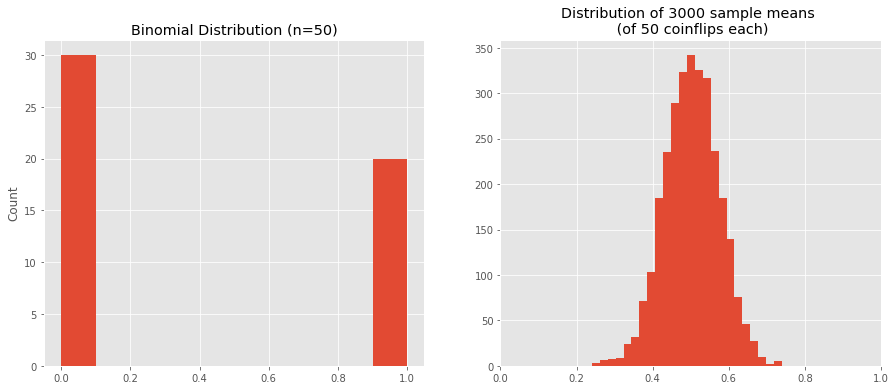

In [0]:
#@title Understand Central Limit Theorem { run: "auto" }

def get_sample_means(sample_size):
    """
    Returns a single sample, and 3000 sample means of sample size each
    """
    sample_means = []
    for x in range(0,3000):
      one_sample = np.random.binomial(n=1, p=.5, size=sample_size)
      sample_means.append(one_sample.mean())
    return (one_sample, sample_means)

def plot_initial_and_sample_dist(one_sample, sample_means):
    """
    Plots side-by-side initial distribution plot, 
    and sample distribution histogram to see Central Limit Theorem tightening
    the bounds towards population mean.
    """
    df = pd.DataFrame({'One Sample': one_sample})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    ax1 = df['One Sample'].hist(ax=ax1)
    title = 'Binomial Distribution (n={})'.format(len(one_sample))
    ax1.set_title(title)
    ax1.set_ylabel('Count')
    ax2.hist(sample_means, bins=24)
    ax2.set_title('Distribution of 3000 sample means \n (of {} coinflips each)'.format(len(one_sample)))
    ax2.set_xlim([0, 1]);

    


sample_size = 50 #@param {type:"slider", min:10, max:300, step:10}
one_sample, sample_means = get_sample_means(sample_size)
plot_initial_and_sample_dist(one_sample, sample_means)

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [0]:
lambda_heights = np.random.uniform(4, 6.5, size=2000)
print(f'Population Size: {len(lambda_heights)}')
print(f'Population Mean: {lambda_heights.mean()}')
print(f'Population Std. Dev.: {lambda_heights.std()}')
lambda_heights = pd.DataFrame({'heights':lambda_heights})
lambda_heights.head()

Population Size: 2000
Population Mean: 5.246477304180795
Population Std. Dev.: 0.7284347082562088


,heights
0,4.900506
1,5.858200
2,4.731356
3,6.115271
4,6.183955


In [0]:
sample1 = lambda_heights['heights'].sample(100)
print(f'Sample1 Size: {sample1.shape[0]}')
print(f'Sample1 Mean: {sample1.mean()}')
print(f'Sample1 Std. Dev.: {sample1.std()}')

Sample1 Size: 100
Sample1 Mean: 5.1791579514975865
Sample1 Std. Dev.: 0.6826763427191528


In [0]:
sample2 = lambda_heights['heights'].sample(100)
print(f'Sample2 Size: {sample2.shape[0]}')
print(f'Sample2 Mean: {sample2.mean()}')
print(f'Sample2 Std. Dev.: {sample2.std()}')

Sample2 Size: 100
Sample2 Mean: 5.311970002982594
Sample2 Std. Dev.: 0.744716488357468


## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
coinflips_100 = np.random.binomial(n=1, p=.5, size=100)
sample_std = np.std(coinflips_100, ddof=1)
standard_error = coinflips_100.mean() / (len(coinflips_100) ** 0.5)
print(f'Sample Mean: {coinflips_100.mean()}')
print(f'Sample Std. Dev.: {sample_std}')
print(f'Sample Std. Error: {standard_error}')

Sample Mean: 0.47
Sample Std. Dev.: 0.5016135580465918
Sample Std. Error: 0.047


In [0]:
scipy_stderr = stats.sem(coinflips_100)
print(f'Scipy Std. Error {scipy_stderr}')

Scipy Std. Error 0.05016135580465918


In [0]:
def confidence_interval(data, confidence=0.95, verbose=False):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  result = (mean, interval, mean - interval, mean + interval)
  if verbose:
        print(
        """
        ---------------------------------------
        Sample Mean: {:.2f}
        Margin of Error: {:.2f}
        Lower: {:.2f}, Upper: {:.2f}
        ---------------------------------------
        """.format(*result))
  return result


result = confidence_interval(coinflips_100, verbose=True)


        ---------------------------------------
        Sample Mean: 0.47
        Margin of Error: 0.10
        Lower: 0.37, Upper: 0.57
        ---------------------------------------
        


### @@@ What confidence level do we want to our confidence interval to represent @@@ ?

- 95 % C.I.'s
- 99 % C.I.'s

In [0]:
sample_size = coinflips_100.shape[0]
t = stats.t.ppf(.975, sample_size-1)
sample_mean = coinflips_100.mean()
stderr = sample_mean / (sample_size ** 0.5)
margin_of_error = t * stderr
confidence_intervals = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f'Sample Mean: {sample_mean:.2f}')
print(f'Margin of Error: {margin_of_error:.2f}')
print(f'Confidence Interval: {np.round(confidence_intervals, 2)}')

Sample Mean: 0.47
Margin of Error: 0.09
Confidence Interval: [0.38 0.56]


## Graphically Represent a Confidence Interval

### > Wrong way to do it, since we overlayed C.I.'s to the original distribution

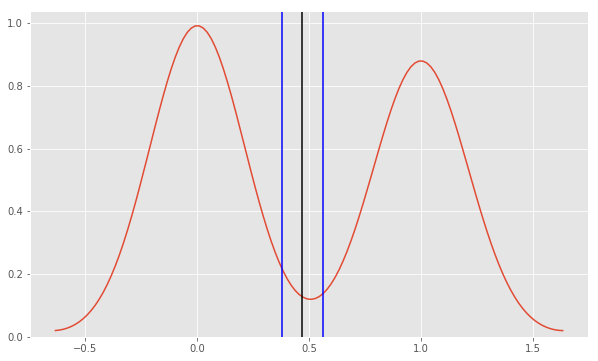

In [0]:
sns.kdeplot(coinflips_100)
plt.axvline(x=confidence_intervals[0], color='b')
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=confidence_intervals[1], color='b');

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.5, 0.6333333333333333, 0.43333333333333335, 0.3333333333333333, 0.4, 0.5666666666666667, 0.4666666666666667, 0.5, 0.43333333333333335, 0.5, 0.5666666666666667, 0.43333333333333335, 0.6, 0.43333333333333335, 0.5, 0.36666666666666664, 0.4, 0.43333333333333335, 0.4666666666666667, 0.5666666666666667, 0.5, 0.43333333333333335, 0.5666666666666667, 0.4, 0.43333333333333335, 0.5666666666666667, 0.5666666666666667, 0.36666666666666664, 0.5333333333333333, 0.6333333333333333, 0.5666666666666667, 0.5, 0.6333333333333333, 0.5666666666666667, 0.36666666666666664, 0.5666666666666667, 0.4666666666666667, 0.26666666666666666, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.4666666666666667, 0.36666666666666664, 0.43333333333333335, 0.6666666666666666, 0.6, 0.5333333333333333, 0.5333333333333333, 0.5666666666666667, 0.4666666666666667, 0.5333333333333333, 0.5666666666666667, 0.3, 0.5, 0.5, 0.5, 0.43333333333333335, 0.5333333333333333, 0.4666666666666667, 0.5666666666666667, 0.5, 0.366

In [0]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.46761286775626804, 0.5030537989103984)


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.46761286775626804, 0.5030537989103984)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.2107662000944306, pvalue=0.228867588593381)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=2.1607060208065736, pvalue=0.03313059161277751)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [0]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [0]:
df = df.sort_values(by='hours_per_week_categories', ascending=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
31290,55,Self-emp-not-inc,41938,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,8,United-States,<=50K,0-9
5172,32,NaN,134886,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,0,2,United-States,>50K,0-9
22928,17,NaN,332666,10th,6,Never-married,NaN,Own-child,White,Female,0,0,4,United-States,<=50K,0-9
7902,35,Private,359131,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,7298,0,8,NaN,>50K,0-9
6604,41,Private,406603,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,6,Iran,<=50K,0-9


In [0]:
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)

contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [0]:
femalecount = contingency_table.iloc[0][0:6].values
femalecount

array([ 235,  671, 1287, 1914, 5636, 1028])

In [0]:
malecount = contingency_table.iloc[1][0:6].values
malecount

array([  223,   575,  1105,  1753, 12700,  5434])

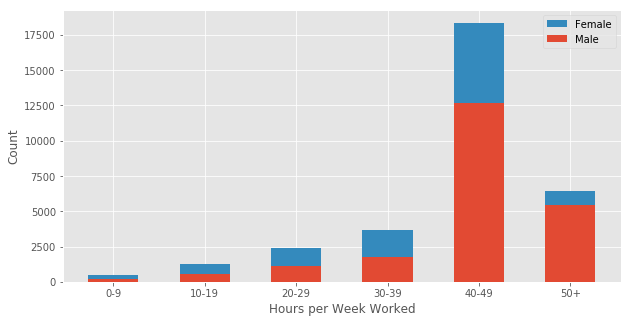

In [0]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55)
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
# Get Row Sums
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [0]:
total = contingency_table.loc['All','All']
total

32561

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [0]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 2287.190943926107


In [0]:
# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")     

Degrees of Freedom: 5


## Run a $\chi^{2}$ Test using Scipy

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom: 5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## ASSIGNMENT - Confidence Intervals

### General Support for the bill, regardless of party affiliation

In [0]:
def load_voting_data():
    column_names = ['party','handicapped-infants','water-project','budget','physician-fee-freeze','el-salvador-aid','religious-groups','anti-satellite-ban','aid-to-contras','mx-missile','immigration','synfuels','education','right-to-sue','crime','duty-free','south-africa']
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_names, na_values='?', ).replace({"y":1, "n":0})
    return df

voting_df = load_voting_data()
voting_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


#### 1. Generate and numerically represent a confidence interval

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, interval, mean - interval, mean + interval)


def get_sample_statistics(df):
    """ 
    Returns data frame consisting of following statistic:
        - sample mean
        - margin of error (intervals)
        - 95% Confidence Intervals - Lower Bound
        - 95 
        
    """
    list_ = []
    for col in df.columns:
        if not col == 'party':
            data = df[col].dropna()
            cis = confidence_interval(data)
            list_.append(cis)
    df = pd.DataFrame(
        data = {
            'mean':[cis[0] for cis in list_],
            'margin_of_error': [cis[1] for cis in list_],
            'lower': [cis[2] for cis in list_],
            'upper': [cis[3] for cis in list_],
            
        },
        index = df.columns[1:],
        
    )
    return df

voting_statistics = get_sample_statistics(voting_df)
voting_statistics

,mean,margin_of_error,lower,upper
handicapped-infants,0.442080,0.047520,0.394560,0.489600
water-project,0.503876,0.050035,0.453841,0.553911
budget,0.596698,0.046883,0.549815,0.643581
physician-fee-freeze,0.417453,0.047129,0.370323,0.464582
el-salvador-aid,0.504762,0.048012,0.456750,0.552774
religious-groups,0.641509,0.045831,0.595678,0.687341
anti-satellite-ban,0.567696,0.047515,0.520181,0.615211
aid-to-contras,0.576190,0.047453,0.528737,0.623644
mx-missile,0.501211,0.048422,0.452788,0.549633
immigration,0.504673,0.047557,0.457116,0.552230


#### 2. Graphically (with a plot) represent the confidence interval

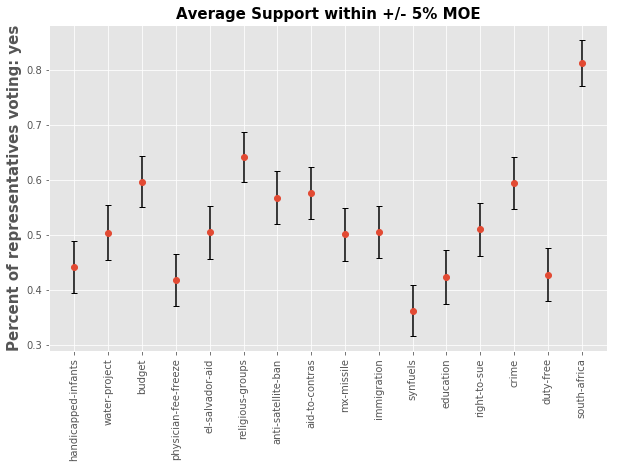

In [0]:
def plot_errorbars(y, yerr, labels, ylabel, title):
    """
    Function plots error bars, given:
        - y as sample means
        - yerr as margin of error
        - labels as column names
        - ylabel as y axis title
        - title as plot title
    """
    x_pos = np.arange(len(labels))
    fig, ax = plt.subplots()
    ax.errorbar(x_pos, y, yerr=yerr, fmt='o', ecolor='k', capsize=3)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
    
    
title = 'Average Support within +/- 5% MOE'
ylabel = 'Percent of representatives voting: yes'
sample_means  = voting_statistics['mean']
intervals = voting_statistics['margin_of_error']
labels = voting_statistics.index

plot_errorbars(sample_means, intervals, labels, ylabel, title)

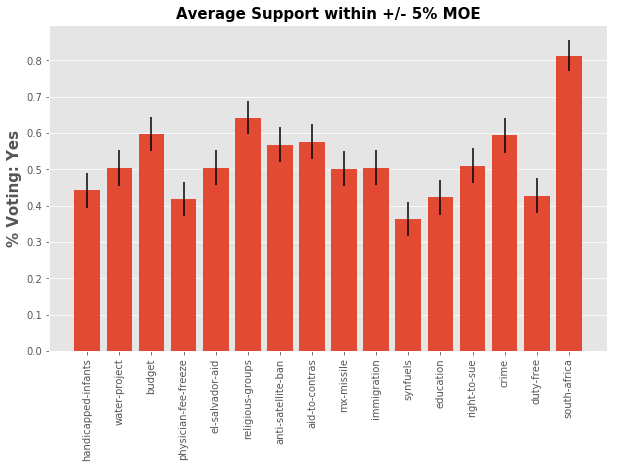

In [0]:
def plot_barplot_w_errors(y, yerr, labels, ylabel, title):
    """
    Plots bar plot with error bars given:
        - y as sample means
        - yerr as margin of error
        - labels as column names
        - ylabel as y axis title
        - title as plot title
    """
    fig, ax = plt.subplots()
    x_pos = np.arange(len(labels))
    ax.bar(x_pos, y, yerr=yerr, align='center', ecolor='k')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_ylabel(ylabel,fontsize=15, fontweight='bold')
    ax.xaxis.grid(False)
    

plot_barplot_w_errors(sample_means, intervals, labels, '% Voting: Yes', 'Average Support within +/- 5% MOE')

### Startified by Party - Democrats & Republicans

### 1. Generate and numerically represent a confidence interval

In [0]:
dems = voting_df[voting_df['party'] == 'democrat']
dems.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
dems_statistics = get_sample_statistics(dems)
dems_statistics

,mean,margin_of_error,lower,upper
handicapped-infants,0.604651,0.060058,0.544593,0.664710
water-project,0.502092,0.063847,0.438245,0.565939
budget,0.888462,0.038518,0.849944,0.926980
physician-fee-freeze,0.054054,0.027722,0.026332,0.081776
el-salvador-aid,0.215686,0.050823,0.164863,0.266509
religious-groups,0.476744,0.061352,0.415392,0.538097
anti-satellite-ban,0.772201,0.051419,0.720782,0.823620
aid-to-contras,0.828897,0.045813,0.783085,0.874710
mx-missile,0.758065,0.053671,0.704394,0.811735
immigration,0.471483,0.060725,0.410757,0.532208


In [0]:
repubs = voting_df[voting_df['party'] == 'republican']
repubs.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
repubs_statistics = get_sample_statistics(repubs)
repubs_statistics

,mean,margin_of_error,lower,upper
handicapped-infants,0.187879,0.060227,0.127652,0.248106
water-project,0.506757,0.081491,0.425266,0.588248
budget,0.134146,0.052711,0.081435,0.186857
physician-fee-freeze,0.987879,0.016872,0.971007,1.004751
el-salvador-aid,0.951515,0.033117,0.918398,0.984632
religious-groups,0.897590,0.046603,0.850987,0.944193
anti-satellite-ban,0.240741,0.066540,0.174201,0.307281
aid-to-contras,0.152866,0.056911,0.095955,0.209778
mx-missile,0.115152,0.049217,0.065935,0.164368
immigration,0.557576,0.076580,0.480996,0.634156


#### 2. Graphically (with a plot) represent the confidence interval

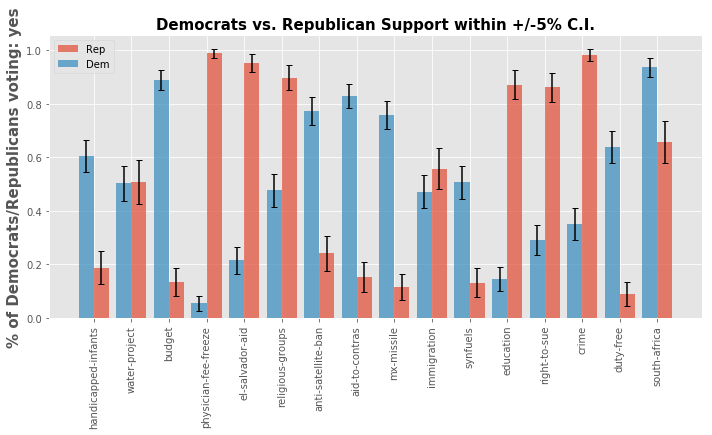

In [0]:
title = 'Democrats vs. Republican Support within +/-5% C.I.'
ylabel = '% of Democrats/Republicans voting: yes'
labels = dems_statistics.index
x_pos = np.arange(len(labels))

# Define figure and axis for the plot
fig, ax = plt.subplots()

# Set default width of bar plot
width = 0.4

# Plot each bar plot by party
ax.bar(x_pos + width/2, repubs_statistics['mean'], width, yerr=repubs_statistics['margin_of_error'], alpha=0.7, ecolor='black', label='Rep', capsize=3)
ax.bar(x_pos - width/2, dems_statistics['mean'], width, yerr=dems_statistics['margin_of_error'], alpha=0.7, ecolor='black', label='Dem', capsize=3)

# Set axis parameters
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=90)

# Set x, y axis titles, and plot title
ax.set_title(title, fontsize=15, fontweight='bold')
ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')

# Call legend
ax.legend()

fig.tight_layout()

### 3. Interpret the confidence interval

From the above barplot, we can notice almost all bills passed, besides `water-project` have evidence for being statistically significant at $\alpha = 0.05$. 



### ASSIGNMENT - Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [0]:
adults_df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(adults_df.shape)
adults_df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###  $\chi^{2}$ Test "by hand" using Numpy

In [0]:
adults_df['salary'].value_counts(dropna=False)

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [0]:
adults_df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [0]:
contingency_table = pd.crosstab(adults_df['salary'], adults_df['occupation'], margins=True)
contingency_table

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
salary,,,,,,,,,,,,,,,
<=50K,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277,23068
>50K,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320,7650
All,3770,9,4099,4066,994,1370,2002,3295,149,4140,649,3650,928,1597,30718


### Reminder, Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
row_sums = contingency_table.iloc[:-1, -1].values
col_sums = contingency_table.iloc[-1, :-1].values
total = contingency_table.loc['All', 'All']
print('Row Sum: ', row_sum)
print('Column Sum: ', col_sum)
print('Total: ', total)

Row Sum:  [23068  7650]
Column Sum:  [3770    9 4099 4066  994 1370 2002 3295  149 4140  649 3650  928 1597]
Total:  30718


In [0]:
expected = []
for row in row_sums:
    expected_row = []
    for col in col_sums:
        expected_val = col * (row/total)
        expected_row.append(expected_val)
    expected.append(expected_row)
    
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 14)
[[2.83112052e+03 6.75864314e+00 3.07818647e+03 3.05340478e+03
  7.46454587e+02 1.02881568e+03 1.50342262e+03 2.47441435e+03
  1.11893092e+02 3.10897584e+03 4.87373266e+02 2.74100527e+03
  6.96891204e+02 1.19928368e+03]
 [9.38879484e+02 2.24135686e+00 1.02081353e+03 1.01259522e+03
  2.47545413e+02 3.41184322e+02 4.98577381e+02 8.20585650e+02
  3.71069080e+01 1.03102416e+03 1.61626734e+02 9.08994726e+02
  2.31108796e+02 3.97716323e+02]]


In [0]:
observed = pd.crosstab(adults_df['salary'], adults_df['occupation']).values
print(observed.shape)
observed

(2, 14)


array([[3263,    8, 3170, 2098,  879, 1284, 1752, 3158,  148, 2281,  438,
        2667,  645, 1277],
       [ 507,    1,  929, 1968,  115,   86,  250,  137,    1, 1859,  211,
         983,  283,  320]])

In [0]:
# Calculate Degrees of Freedom
dof = (len(row_sum)-1)*(len(col_sum)-1)
print(f"Degrees of Freedom: {dof}")     

Degrees of Freedom: 13


In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 3744.8987583977078


### $\chi^{2}$ Test using Scipy

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n")
pd.DataFrame(data=np.array(expected), index=df['salary'].value_counts().index, columns=df['occupation'].value_counts().index)

Chi-Squared: 3744.8987583977073
P-value: 0.0
Degrees of Freedom: 13
Expected: 



,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
<=50K,2831.120516,6.758643,3078.18647,3053.404779,746.454587,1028.815678,1503.422619,2474.41435,111.893092,3108.975845,487.373266,2741.005274,696.891204,1199.283677
>50K,938.879484,2.241357,1020.81353,1012.595221,247.545413,341.184322,498.577381,820.58565,37.106908,1031.024155,161.626734,908.994726,231.108796,397.716323


> **Null Hypothesis:**  Occupation is independent of Salary

> Due to a p-value of 0, we REJECT the null hypothesis that occupation and salary are independent, and conclude that there is an association between them.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)